In [1]:
#importing some genuine libraries
import cv2
#cv2 is used for image processing
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [2]:
# distance estimation function

def Distance_finder(Focal_Length, real_face_width, face_width_in_frame):
    distance = (real_face_width * Focal_Length) / face_width_in_frame

    return distance

In [3]:
# focal length finder function

def Focal_Length_Finder(measured_distance, real_width, width_in_rf_image):
    # finding the focal length

    focal_length = (width_in_rf_image * measured_distance) / real_width

    return focal_length

In [4]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml


--2025-05-08 12:37:43--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.1’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.01s   

2025-05-08 12:37:43 (86.1 MB/s) - ‘haarcascade_frontalface_default.xml.1’ saved [930127/930127]



In [5]:
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")


In [6]:
# face detector object
#face_cascade = cv2.CascadeClassifier("/content/haar_cascade_classifier.xml")

In [7]:
# function for finding width of the face
def face_data(image):
    face_width = 0  # making face width to zero

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #for converting into grayscale
    faces = face_cascade.detectMultiScale(gray_image, 1.3, 5)
    for (x, y, h, w) in faces:
              cv2.rectangle(image, (x, y), (x + w, y + h), GREEN, 2)
              face_width = w
    return face_width

In [8]:
# Colors

GREEN = (0, 255, 0)
RED = (0, 0, 255)
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)

In [9]:
# defining the fonts
fonts = cv2.FONT_HERSHEY_COMPLEX


(480, 630, 3)


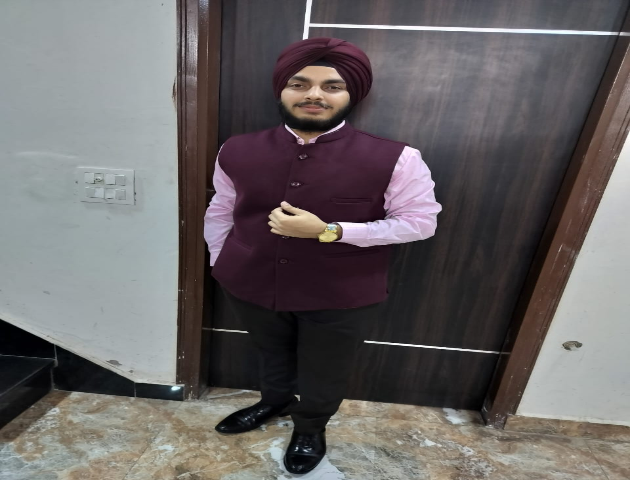

In [10]:
import cv2
from google.colab.patches import cv2_imshow

path = '/content/my_Pic.jpg'
x = cv2.imread(path)

if x is None:
    print("Image not found or the path is incorrect.")
else:
    train_image = cv2.resize(x, (630, 480))
    print(train_image.shape)
    cv2_imshow(train_image)


In [11]:
# distance from camera to object(face) measured in centimeter
Known_distance = 100.0

# width of face in the real world or Object Plane in centimeter
Known_width = 22.6

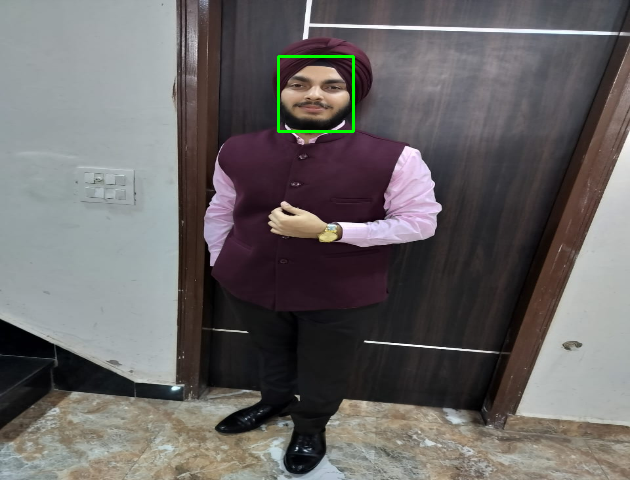

In [12]:
# find the face width(pixels) in the reference_image
train_image_face_width = face_data(train_image)
cv2_imshow(train_image)

In [13]:
# get the focal by calling "Focal_Length_Finder"
# face width in reference(pixels)

Focal_length_found = Focal_Length_Finder(

    Known_distance, Known_width, train_image_face_width)

print(Focal_length_found)

331.858407079646


Below given image is the image which is used to train the model and at the time of training. It was given that the distance from that image to camera is 76.2 cm

In [14]:
z=cv2.imread(r'/content/my_Pic.jpg')
ximage=cv2.resize(z,(630,480))
print(ximage.shape)
#cv2_imshow(ximage)

(480, 630, 3)


(480, 630, 3)


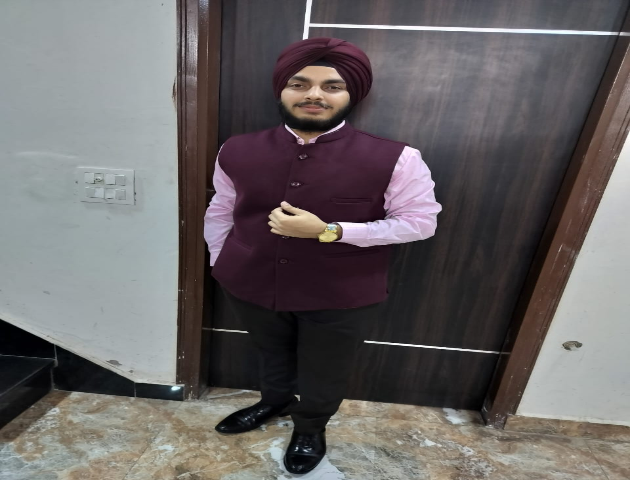

In [15]:
import cv2
from google.colab.patches import cv2_imshow

z = cv2.imread('/content/my_Pic.jpg')

if z is None:
    print("Image not found or the path is incorrect.")
else:
    ximage = cv2.resize(z, (630, 480))
    print(ximage.shape)
    cv2_imshow(ximage)


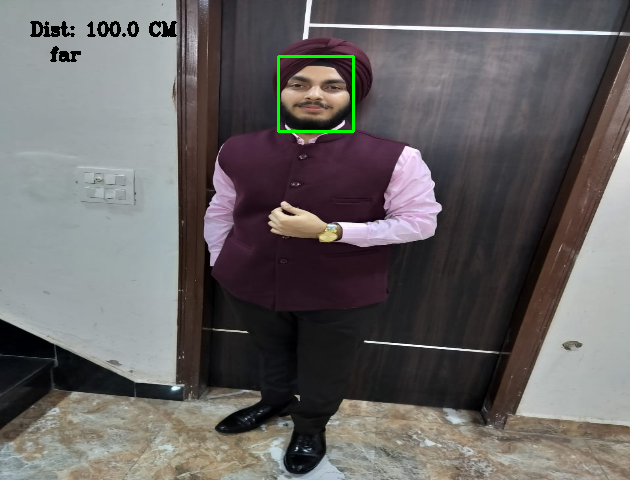

In [16]:
    face_width_in_frame1 = face_data(ximage)
    if face_width_in_frame1 != 0:

        # finding the distance by calling function
        Distance = Distance_finder( Focal_length_found, Known_width, face_width_in_frame1 )


        if Distance>=100:
            cv2.putText(ximage,"far",(50,60),fonts, 0.6, BLACK, 2)
            cv2.putText( ximage, f"Dist: {round(Distance, 2)} CM", (30, 35), fonts, 0.6, BLACK, 2)
        else:
            cv2.putText(ximage,"near",(50,60),fonts, 0.6, BLACK, 2)
            cv2.putText( ximage, f"Dist: {round(Distance, 2)} CM",(30,35), fonts, 0.6, BLACK, 2)


    # show the frame on the screen

    cv2_imshow(ximage)

In [28]:
y=cv2.imread(r'/content/testpic.jpg')
test_image=cv2.resize(y,(630,480))
test_image.shape


(480, 630, 3)

In [29]:
face_width_in_frame = face_data(test_image)

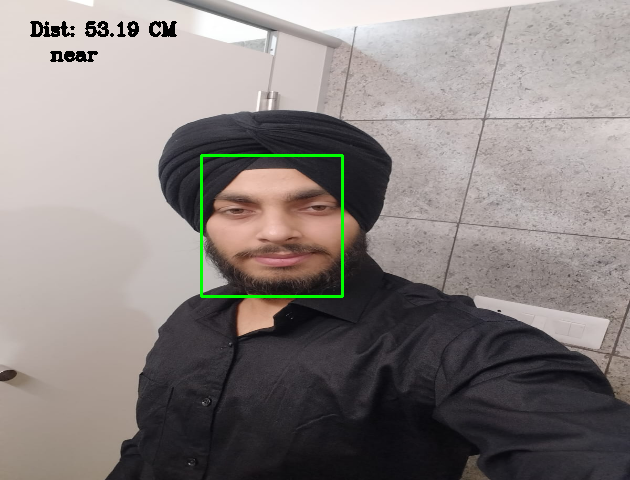

In [30]:
    if face_width_in_frame != 0:

        # finding the distance by calling function
        Distance = Distance_finder( Focal_length_found, Known_width, face_width_in_frame )


        if Distance>=100:
            cv2.putText(test_image,"far",(50,60),fonts, 0.6, BLACK, 2)
            cv2.putText( test_image, f"Dist: {round(Distance, 2)} CM", (30, 35), fonts, 0.6, BLACK, 2)
        else:
            cv2.putText(test_image,"near",(50,60),fonts, 0.6, BLACK, 2)
            cv2.putText( test_image, f"Dist: {round(Distance, 2)} CM",(30,35), fonts, 0.6, BLACK, 2)


    # show the frame on the screen

    cv2_imshow(test_image)

here in the image our program is showing distance is 46 cm and far from the camera